In [1]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from kv_cache import *
from pprint import pprint
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

import os

/home/27a_sul@lab.graphicon.ru/miniconda3/envs/nlp/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
model = GPT2LMHeadModel.from_pretrained("../fine_tuned_rugpt2")
tokenizer = GPT2Tokenizer.from_pretrained("../fine_tuned_rugpt2")

In [ ]:
kv_res = test_kv_cache(model, tokenizer, 500, text='<|startoftext|>', timer_type='torch')

In [ ]:
cache = {'elapsed_time': [], 'ram_memory': [], 'gpu_memory': []}
no_cache = {'elapsed_time': [], 'ram_memory': [], 'gpu_memory': []}
for len_seq in tqdm(range(50, 1051, 100)):
    kv_res = test_kv_cache(model, tokenizer, len_seq, text='<|startoftext|>', timer_type='torch')

    cache['elapsed_time'].append(kv_res['cache']['elapsed_time'])
    no_cache['elapsed_time'].append(kv_res['no_cache']['elapsed_time'])

    cache['ram_memory'].append(kv_res['cache']['ram_memory'])
    no_cache['ram_memory'].append(kv_res['no_cache']['ram_memory'])

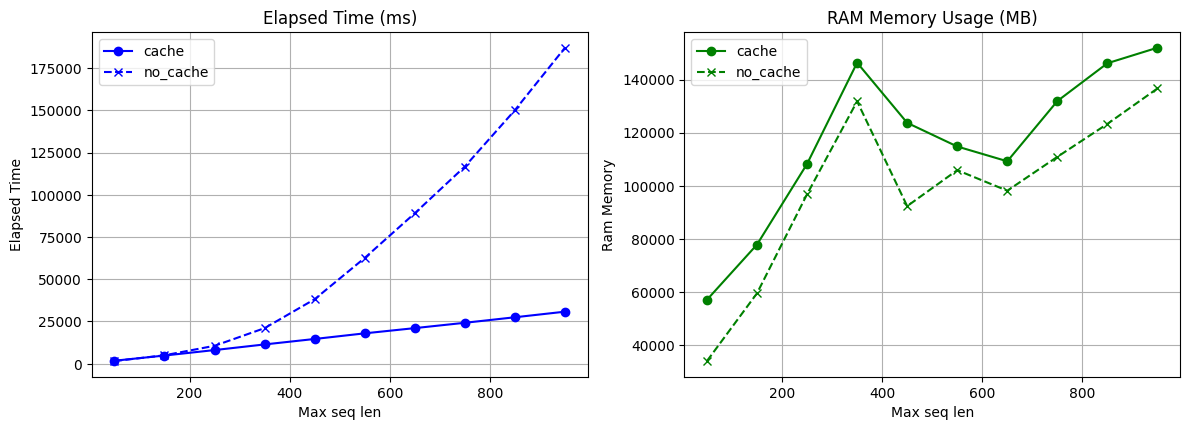

In [ ]:
metrics = ['elapsed_time', 'ram_memory']
titles = ['Elapsed Time (ms)', 'RAM Memory Usage (MB)']
colors = ['blue', 'green', 'red']

x_values = [x for x  in range(50, 1001, 100)]
plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    plt.plot(x_values, cache[metric], label='cache', color=colors[i], marker='o')
    plt.plot(x_values, no_cache[metric], label='no_cache', color=colors[i], linestyle='--', marker='x')
    plt.title(titles[i])
    plt.xlabel('Max seq len')
    plt.ylabel(metric.replace('_', ' ').title())
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()